## EE 461P: Data Science Principles  
### Homework 2  
### Total points: 95
### Due: Feb 16, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):

1. Mervan Can Kaya, mk45596
2. Jacob Dahlkvist, jad7543

# Q1. Bias-Variance Trade-off (20 points)

## 1.1 Bias-Variance Decomposition (10 points)
Consider a real-valued function $h(x)$. You were trying to estimate this function using a regression model on the dataset $D$ consisting of $(X, Y)$ pairs. Let the output of the training procedure be another function given by $y(x;D)$. This new function $y(x;D)$ depends on $D$ since it was obtained by regressing on $D$.

To evaluate how well $y(x;D)$ generalizes we are interested in computing the expected error $E_D [(y(x; D) - h(x))^2]$, where the expectation is over all datasets of the same size as $D$, each obtained by i.i.d. sampling from the underlying joint distribution of X and Y. Show that this expected error decomposes into a bias term plus a variance term that you have seen in lecture slides named '2A dsp regression1.pdf'.

Hint: 
Write
$$
  (y(x; D) - h(x))^2 = ( y(x; D) - E_D [y(x; D)] + E_D [y(x; D)] - h(x))^2 = (y(x; D) - E_D [y(x; D)])^2 + (E_D [y(x; D)] - h(x))^2 - 2 (y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))
$$

And take expectation over $D$ on both sides

ANSWER:

$E_D [(y(x;D)-h(x))^2] = E_D [(y(x;D)-E_D[y(x;D)])^2 + (E_D[y(x;D)]-h(x))^2 - 2(y(x;D)-E_D[y(x;D)])(E_D[y(x;D)]-h(x))] \
= E_D [(y(x;D)-E_D[y(x;D)])^2] + E_D [(E_D[y(x;D)]-h(x))^2] - E_D[2(y(x;D)-E_D[y(x;D)])(E_D[y(x;D)]-h(x))] \
= \text{Variance} + \text{Bias}^2 + 2\text{Covariance} - 2\text{Bias}\text{Bias} \
= \text{Variance} + \text{Bias}^2 + 2\text{Covariance} - \text{Bias}^2 \
= \text{Variance} + \text{Bias}^2 + 2\text{Covariance}$

where the first line is the expansion using the hint, the second line is the rearrangement and the use of linearity of expectation, the third line is the bias-variance decomposition, the fourth line is the use of covariance definition and the rearrangement, and the final line is the simplification.

Therefore, we have decomposed the expected error into a variance term, a squared bias term, and a covariance term between the model's predictions and the true function.

## 1.2 Bias-Variance Explanation (5 points)
Briefly explain the bias and variance formulas that were derived above and describe how they relate to underfitting/overfitting.

ANSWER:

The bias-variance decomposition is a technique that allows us to evaluate the performance of a machine learning model based on two types of errors: bias and variance.

Bias represents how well the model fits the true value on average, assuming the training process is repeated on new datasets of the same size. A high bias suggests that the model is too simple to capture the complexity of the input-output relationship, resulting in poor performance on both training and unseen data. This is called underfitting, where the model is not complex enough to capture the underlying relationship.

Variance, on the other hand, measures how sensitive the model is to variations in the data. High variance suggests that the model is too complex and is overfitting to the training data. In this case, the model will perform well on the training set but not on new data as it has learned the noise in the training data. This is referred to as overfitting.

Therefore, the balance between bias and variance is crucial in achieving good model performance. The goal is to find the right balance between the two errors. This is known as the bias-variance trade-off, which can be visualized as a U-shaped curve. To balance the bias and variance, we may need to use regularization or feature selection. The ultimate aim is to find the sweet spot where the total error is minimized.

## 1.3 Underfitting vs Overfitting (5 points)
Suppose you have randomly divided the given dataset $D$ into a training dataset and a test dataset. Now you keep on gradually reducing the size of train dataset by moving some points to the test set. As the train set size decreases, what do you
expect will happen to the train and test errors? In your answers, consider both the expected values of these two quantities as well the spread (variance) in the values obtained. Justify briefly.

ANSWER:

As the size of the training dataset is gradually reduced by moving some points to the test set, both the training and test errors are expected to increase. The increase in errors is due to the model becoming less capable of capturing the underlying relationship between input and output as the amount of training data decreases. Moreover, the variance in the values obtained is expected to increase due to the model being trained on a smaller subset of the data, which may lead to overfitting or underfitting.

## Answer:

# Q2. Log-likelihood (10 points)

Consider a linear regression model $y = w.x + ϵ$. Here $x$ is a scalar. The noise  $ϵ$ is IID but depends on $x$ in a way described below:
$$
ϵ_i ∼ N(0, σ^2) \quad \text{if } x_i > 0 
$$
and   
$$
ϵ_i ∼ N(0, 4σ^2) \quad \text{if } x_i \leq 0 
$$
Given $n$ observations ${y_1,y_2, \dots y_n}$, derive the negative log-likelihood term for this assumed generative model. 

ANSWER:

The probability density function of a normally distributed noise term εi with mean 0 and variance σ^2 is given by:

$p(\varepsilon_i) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{(\varepsilon_i - 0)^2}{2\sigma^2}\right)$

For xi > 0, εi is normally distributed with mean 0 and variance σ^2. Therefore, the probability density function of εi is given by:

$p(\epsilon_i) = \frac{1}{2\pi\sigma^2} \exp\left[-\frac{(\epsilon_i - 0)^2}{2\sigma^2}\right]$

For xi ≤ 0, εi is normally distributed with mean 0 and variance 4σ^2. Therefore, the probability density function of εi is given by:

$p(\epsilon_i) = \frac{1}{2\pi(4\sigma^2)} \cdot \exp \left(-\frac{(\epsilon_i-0)^2}{2(4\sigma^2)}\right)$

The negative log-likelihood for the i-th observation is given by:

\begin{equation}
-\log p(y_i | w, x_i) =
\begin{cases}
\frac{(y_i - w x_i)^2}{2\sigma^2} + \frac{1}{2}\log(2\pi\sigma^2), & \text{if}\ x_i > 0 \
\frac{(y_i - w x_i)^2}{2(4\sigma^2)} + \frac{1}{2}\log(2\pi(4\sigma^2)), & \text{if}\ x_i \leq 0
\end{cases}
\end{equation}

The negative log-likelihood for all n observations is:

$-log L(w;y,x) = \sum_{i=1}^n [-\log p(y_i|w, x_i)] = \sum_{i=1}^n \begin{cases} 2\sigma^2(y_i-wx_i)^2 + \frac{1}{2}\log(2\pi\sigma^2) & \text{if } x_i > 0 \\ 2(4\sigma^2)(y_i-wx_i)^2 + \frac{1}{2}\log(2\pi(4\sigma^2)) & \text{if } x_i \leq 0 \end{cases}$



## Answer:

# Q3. Model Complexity and Bias/Variance Trade-off (35 points)

3.1 Load the data given in `all_data_q5.npy` using `numpy.load()` function. This dataset contains the train and test datasets in `(x_train, y_train)` and `(x_test, y_test)` respectively. 

Now, fit the polynomial models of degrees 1, 5, and 10 on the training data, and print out the mean squared error for train and test datasets for all the models. Essentially, we are trying to fit linear models of this form: $\hat f(x) = \beta_0 + \beta_1x + \beta_1 x^2 + ... + \beta_px^p$, where $p$ is the degree of the polynomial. (10 points)

Visualise the trained models by making predictions on evenly spaced numbers on x-axis in a fixed range, for eg. you can generate x's by calling `x_all = np.linspace(0, 1, 75).reshape(-1,1)` and call predict on x_all.

In the same figure, add the following plots:

i) Train data plot : y_train vs x_train

ii) Test data plot : y_test vs x_test

All the plots must clearly labeled. (10 points)



**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train` and you can call `np.vander` inside the fit method of linear regression. 


Make use of the starter code we have provided, and fill the `plot_curves` function.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('all_data_q5.npy', allow_pickle=True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test = data_load.item().get("y_test")



In [38]:
def make_vector(x, p):
  return np.vander(np.squeeze(x), p+1)

def plot_curves(x_train, y_train, x_test, y_test, plot=True):
  # Fit polynomial models of degrees 1, 5, 10 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  lrp = LinearRegression()
  model_1 = lrp.fit(make_vector(x_train, 1), y_train)
  lrp = LinearRegression()
  model_5 = lrp.fit(make_vector(x_train, 5), y_train)
  lrp = LinearRegression()
  model_10 = lrp.fit(make_vector(x_train, 10), y_train)

  x_all = np.linspace(0, 1, 75).reshape(-1, 1)
  y_pred_1 = model_1.predict(make_vector(x_all, 1))
  y_pred_5 = model_5.predict(make_vector(x_all, 5))
  y_pred_10 = model_10.predict(make_vector(x_all, 10))

  if plot:
    plt.figure(figsize=(10, 10))
    plt.scatter(x_train, y_train, label='train')
    plt.scatter(x_test, y_test, label='test')
    plt.plot(x_all, y_pred_1, label='degree 1')
    plt.plot(x_all, y_pred_5, label='degree 5')
    plt.plot(x_all, y_pred_10, label='degree 10')
    plt.legend()
    plt.show()
  

  train_mse_1 = mean_squared_error(y_train, model_1.predict(make_vector(x_train, 1)))
  train_mse_5 = mean_squared_error(y_train, model_5.predict(make_vector(x_train, 5)))
  train_mse_10 = mean_squared_error(y_train, model_10.predict(make_vector(x_train, 10)))
  test_mse_1 = mean_squared_error(y_test, model_1.predict(make_vector(x_test, 1)))
  test_mse_5 = mean_squared_error(y_test, model_5.predict(make_vector(x_test, 5)))
  test_mse_10 = mean_squared_error(y_test, model_10.predict(make_vector(x_test, 10)))

  return {"train_mse_1": train_mse_1,
          "train_mse_5": train_mse_5,
          "train_mse_10": train_mse_10
          }, {"test_mse_1": test_mse_1,
              "test_mse_5": test_mse_5,
              "test_mse_10": test_mse_10}

Fit the different polynomials to the training data and make the plots:

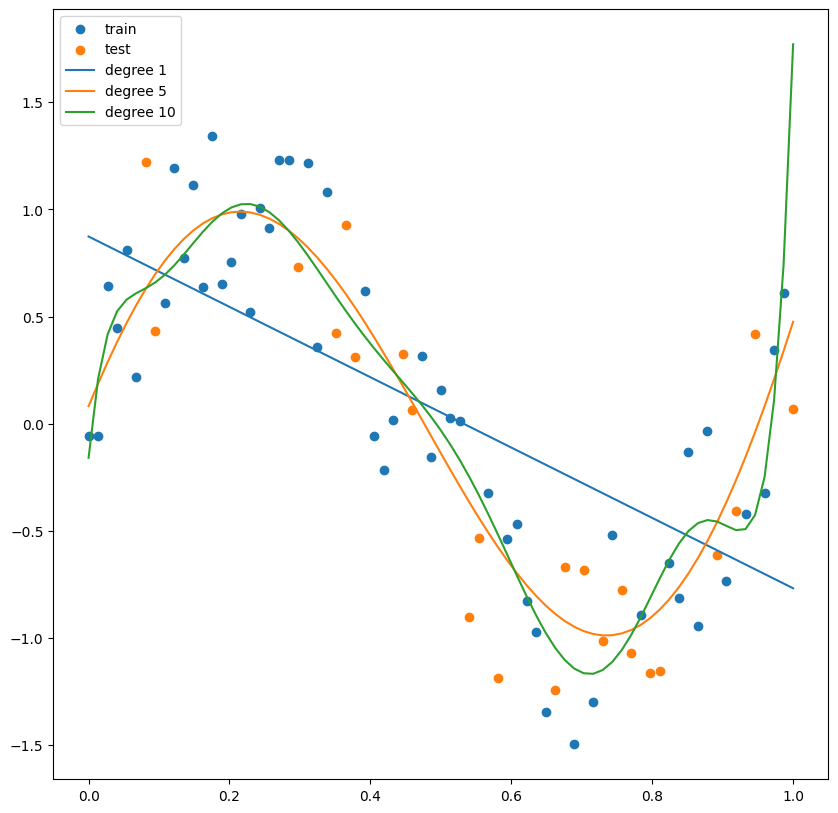

train_mses_100 {'train_mse_1': 0.3209424340594463, 'train_mse_5': 0.09698205116425813, 'train_mse_10': 0.07988296881674674}
test_mses_100 {'test_mse_1': 0.3761180477921123, 'test_mse_5': 0.09740841628524041, 'test_mse_10': 0.264611085336515}


In [39]:
train_mses_100, test_mses_100 = plot_curves(x_train, y_train, x_test, y_test)
print("train_mses_100", train_mses_100)
print("test_mses_100", test_mses_100)


3.2 Which model gives the best performance (measured by MSE)? Explain in terms of the bias-variance tradeoff. (5 points)


3.3 Analyse how the training data size affects bias and variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. For each of the three models, plot $log(MSE)$ on train dataset vs the size of the training data and again $log(MSE)$ on test dataset vs the size of the training data. State the trends you see as you change the size of the training data on each of the models and explain why you see them. All plots must be in a single figure and labelled correctly. (10 points)

Study the effects of the training data size on the bias and variance

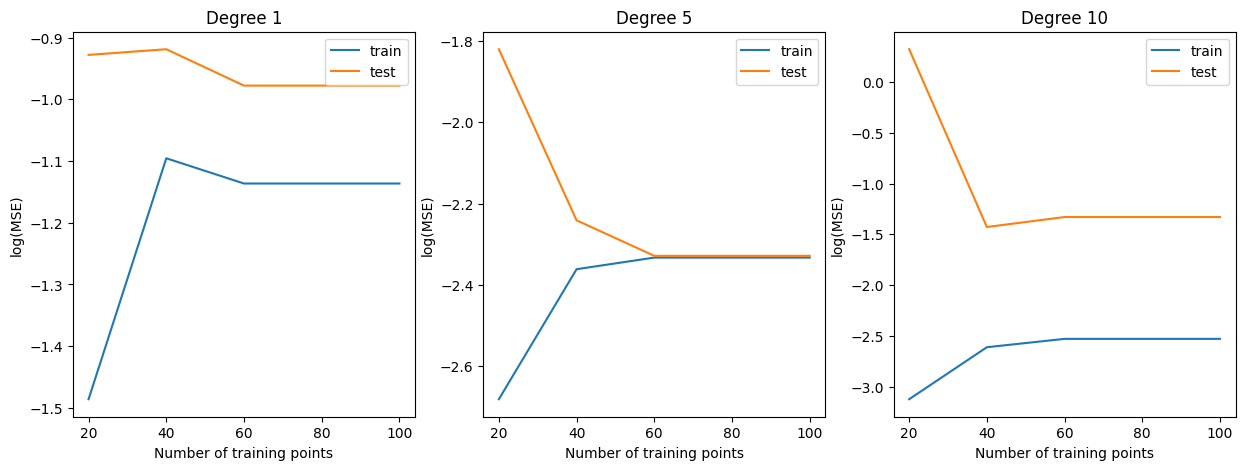

In [40]:
train_mses_20, test_mses_20 = plot_curves(x_train[:20], y_train[:20], x_test, y_test, plot=False)
train_mses_40, test_mses_40 = plot_curves(x_train[:40], y_train[:40], x_test, y_test, plot=False)
train_mses_60, test_mses_60 = plot_curves(x_train[:60], y_train[:60], x_test, y_test, plot=False)
train_mses_80, test_mses_80 = plot_curves(x_train[:80], y_train[:80], x_test, y_test, plot=False)
train_mses_100, test_mses_100 = plot_curves(x_train, y_train, x_test, y_test, plot=False)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
models = ['1', '5', '10']

for i in range(len(models)):
    model_train = "train_mse_" + models[i]
    model_test = "test_mse_" + models[i]

    ax[i].plot([20, 40, 60, 80, 100], np.log([train_mses_20[model_train], train_mses_40[model_train], train_mses_60[model_train], train_mses_80[model_train], train_mses_100[model_train]]), label='train')
    ax[i].plot([20, 40, 60, 80, 100], np.log([test_mses_20[model_test], test_mses_40[model_test], test_mses_60[model_test], test_mses_80[model_test], test_mses_100[model_test]]), label='test')
    ax[i].set_title('Degree ' + models[i])
    ax[i].set_xlabel('Number of training points')
    ax[i].set_ylabel('log(MSE)')
    ax[i].legend()

plt.show()

## Answer:


# Q4. Stochastic Gradient Descent (20 points)

4.1 In class you studied about SGD wherein instead of computing the "full" gradient over all data points $\nabla f(w) = \dfrac{1}{N} ∑_{i=1}^{N} \nabla f_i(w)$, you just estimate the gradient based on one randomly selected data point $\nabla f_i(w)$ at a time, and use it to move forward in optimization. Show that this "stochastic gradient" is an unbiased estimator of the full gradient. (10 points)

4.2 Suppose you are using SGD optimization to solve a linear regression problem $y = w^Tx$ to obtain the $w$ that minimizes the mean squared error $E(w) = \dfrac{1}{N} \sum_{i=1}{N} (y_i - w^Tx_i)^2$ . Given that you initialise $w$ as $w_0$, write the one step update equation for $w$. Here $x$ is a vector with $M+1$ components. (10 points)

## Answer:

### 4.1
Stochastic Gradient Descent (SGD) estimates the gradient based on one randomly selected data point $\nabla f_i(w)$ at a time. We need to show that this stochastic gradient is an unbiased estimator of the full gradient $\nabla f(w) = \dfrac{1}{N} ∑_{i=1}^{N} \nabla f_i(w)$. By taking the expected value of both sides, we can show that $E[\nabla f_i(w)] = \nabla f(w)$. Using the definition of expectation and probability distribution, we can show that $E[\nabla f_i(w)] = \dfrac{1}{N} \nabla f_i(w)$, which we can substitute in the equation for $E[\nabla f(w)]$ to get $E[\nabla f(w)] = \nabla f(w)$. Therefore, the stochastic gradient is an unbiased estimator of the full gradient.

### 4.2
The one step update equation for $w$ using SGD optimization for linear regression with mean squared error as the objective function is:

$w_{t+1} = w_t - \alpha \nabla E_i(w_t)$

where $w_t$ is the value of $w$ at iteration $t$, $\alpha$ is the learning rate, $\nabla E_i(w_t)$ is the gradient of the mean squared error with respect to the $i$-th data point, and is given by:

$\nabla E_i(w_t) = -\frac{2}{N}(y_i - w_t^Tx_i)x_i$

Here $N$ is the total number of data points and $x_i$ is the input vector for the $i$-th data point with $M+1$ components.

# Q5. Neural Network Basics (10 points)

5.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

5.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)



## Answer: